In [5]:
import numpy as np

# Load the training data and labels
train_data = np.load('X_kannada_MNIST_train.npz')
X_train = train_data['arr_0']

train_labels = np.load('y_kannada_MNIST_train.npz')
y_train = train_labels['arr_0']

# Load the test data and labels
test_data = np.load('X_kannada_MNIST_test.npz')
X_test = test_data['arr_0']

test_labels = np.load('y_kannada_MNIST_test.npz')
y_test = test_labels['arr_0']

# Print the shapes of the loaded data
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


In [6]:
import numpy as np

# Load the npz file
dataset = np.load('X_kannada_MNIST_train.npz')

# Extract the data
x_train = dataset['arr_0']

# Print the shape of the extracted data
print("Training data shape:", x_train.shape)

Training data shape: (60000, 28, 28)


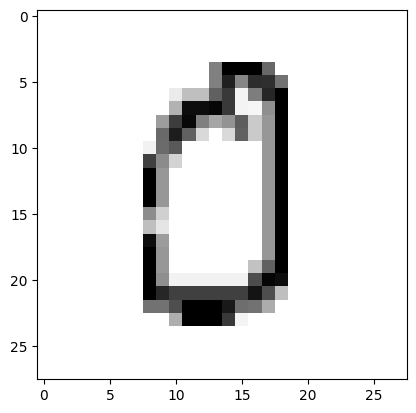

In [7]:
import matplotlib.pyplot as plt
import matplotlib

some_digit=X_train[90]

some_digit_img=some_digit.reshape(28,28)

plt.imshow(some_digit_img,cmap=matplotlib.cm.binary,interpolation="nearest")



In [8]:
y_train[90]

0

In [9]:
##Performing PCA to the data

from sklearn.decomposition import PCA

X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

# Perform PCA with 10 components
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_2d)
X_test_pca = pca.transform(X_test_2d)

y_train[1].dtype



dtype('uint8')

In [10]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score,confusion_matrix

def evaluate_model(model, x_train, y_train, x_test, y_test):
    # Fit the model on the training data
    model.fit(x_train, y_train)

    # Predict labels for the test data
    y_pred = model.predict(x_test)

    # Calculate accuracy, f1-score, and recall
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')

    # Calculate ROC-AUC score
    y_pred_proba = model.predict_proba(x_test)
    roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    
    ## Calculating Confusion Matrix
    conf_matrix=confusion_matrix(y_test,y_pred)

    # Return evaluation metrics
    return accuracy, f1, recall, roc_auc, conf_matrix

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [12]:
dt_classifier = DecisionTreeClassifier()
dt_accuracy, dt_f1, dt_recall, dt_roc_auc, dt_confusion_matrix = evaluate_model(dt_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree F1-score:", dt_f1)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree ROC-AUC:", dt_roc_auc)
print("Decision Tree Confusion Matrix:")
print(dt_confusion_matrix)

Decision Tree Accuracy: 0.8004
Decision Tree F1-score: 0.7997324233817635
Decision Tree Recall: 0.8004
Decision Tree ROC-AUC: 0.8891111111111112
Decision Tree Confusion Matrix:
[[734 148  17  35   8   3   2   6  31  16]
 [ 72 803   4  29  12  17   2   9  34  18]
 [  5   2 930  11   8  21  11   8   2   2]
 [ 16  16   7 754  37  33  25  65  23  24]
 [  0   3   2  42 850  43   5  12  15  28]
 [  4   8  13  18 111 807  12   8  12   7]
 [  5   7   7  44  16  35 752 103  13  18]
 [ 15  11   8  59  27   6 141 678  15  40]
 [ 48  26   4   8   6  21   7   1 864  15]
 [ 15  42   3   6  27   6   5  12  52 832]]


In [13]:
rf_classifier = RandomForestClassifier()
rf_accuracy, rf_f1, rf_recall, rf_roc_auc, rf_confusion_matrix = evaluate_model(rf_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest F1-score:", rf_f1)
print("Random Forest Recall:", rf_recall)
print("Random Forest ROC-AUC:", rf_roc_auc)
print("Random Forest Confusion Matrix",rf_confusion_matrix)

Random Forest Accuracy: 0.8748
Random Forest F1-score: 0.8741112815025408
Random Forest Recall: 0.8748000000000001
Random Forest ROC-AUC: 0.9896802222222222
Random Forest Confusion Matrix [[777 152   4  26   5   0   3   2  23   8]
 [ 34 907   1  20   6   2   0   3  18   9]
 [  4   2 982   3   0   5   0   2   1   1]
 [  9   9   2 890  20  18   9  26  15   2]
 [  0   1   0  26 922  32   3   2   8   6]
 [  0   2   2   9 118 851   4   5   5   4]
 [  3   7   1  55  12  20 834  51   3  14]
 [  4  12   0  45  24   1 135 737  11  31]
 [ 16  12   1   4   3   4   2   0 953   5]
 [  6  13   0   4  21   0   4   4  53 895]]


In [14]:
nb_classifier = GaussianNB()
nb_accuracy, nb_f1, nb_recall, nb_roc_auc, nb_confusion_matrix = evaluate_model(nb_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes F1-score:", nb_f1)
print("Naive Bayes Recall:", nb_recall)
print("Naive Bayes ROC-AUC:", nb_roc_auc)
print("Naive Bayes Confusion Matrix:")
print(nb_confusion_matrix)

Naive Bayes Accuracy: 0.7726
Naive Bayes F1-score: 0.7711969328879404
Naive Bayes Recall: 0.7726
Naive Bayes ROC-AUC: 0.9722511333333334
Naive Bayes Confusion Matrix:
[[608 229  16  70   8   0   2  13  45   9]
 [ 25 749   9 121   8   2   0   0  66  20]
 [  9   1 967   3   0  15   1   3   1   0]
 [ 13   7   2 845  32  16  20  64   0   1]
 [  1   1   1  38 872  43   1   8  28   7]
 [  0   2  15  47 164 732   6  16  12   6]
 [  5   9  51  30  25  44 728  95   3  10]
 [  9  17   4  80  50   1 177 650   2  10]
 [ 89  35  26   6   4   3   2   4 823   8]
 [ 19  28   1   8  62   0   3  21 106 752]]


In [15]:
knn_classifier = KNeighborsClassifier(n_neighbors=8)
knn_accuracy, knn_f1, knn_recall, knn_roc_auc, knn_confusion_matrix = evaluate_model(knn_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("K-NN Accuracy:", knn_accuracy)
print("K-NN F1-score:", knn_f1)
print("K-NN Recall:", knn_recall)
print("K-NN ROC-AUC:", knn_roc_auc)
print("K-NN Confusion Matrix")
print(knn_confusion_matrix)

K-NN Accuracy: 0.8812
K-NN F1-score: 0.8800798668112504
K-NN Recall: 0.8812
K-NN ROC-AUC: 0.9736345055555556
K-NN Confusion Matrix
[[776 168   1  26   2   0   2   3  15   7]
 [ 18 943   0  16   4   1   0   2  11   5]
 [  6   1 979   3   0   7   1   2   1   0]
 [ 10  12   0 886  21  22   3  16  26   4]
 [  0   1   0  14 952  22   1   2   4   4]
 [  0   3   0   8 116 857   3   3   4   6]
 [  0   6   0  43  21  10 841  65   0  14]
 [  7   9   0  52  33   3 167 698   6  25]
 [ 15   9   2   2   3   6   2   0 958   3]
 [  5   7   0   0  25   0   7   4  30 922]]


In [16]:
svm_classifier = SVC(probability=True)
svm_accuracy, svm_f1, svm_recall, svm_roc_auc, svm_confusion_matrix = evaluate_model(svm_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("SVM Accuracy:", svm_accuracy)
print("SVM F1-score:", svm_f1)
print("SVM Recall:", svm_recall)
print("SVM ROC-AUC:", svm_roc_auc)
print("SVM confusion Matrix")
print(svm_confusion_matrix)

SVM Accuracy: 0.8876
SVM F1-score: 0.8870691138181888
SVM Recall: 0.8876
SVM ROC-AUC: 0.9925209
SVM confusion Matrix
[[810 140   1  22   6   0   1   2  15   3]
 [ 19 925   0  26   2   3   0   5  12   8]
 [  3   2 984   0   0   5   0   4   1   1]
 [  8  11   0 888  19  23   7  26  18   0]
 [  0   1   0  14 948  22   0   0   5  10]
 [  0   4   1   4 122 856   3   3   4   3]
 [  0  10   1  51  20  20 846  39   0  13]
 [  6  13   0  32  16   4 135 749   7  38]
 [  8  14   4   0   4   4   3   0 959   4]
 [  2  13   0   0  24   0   6   3  41 911]]


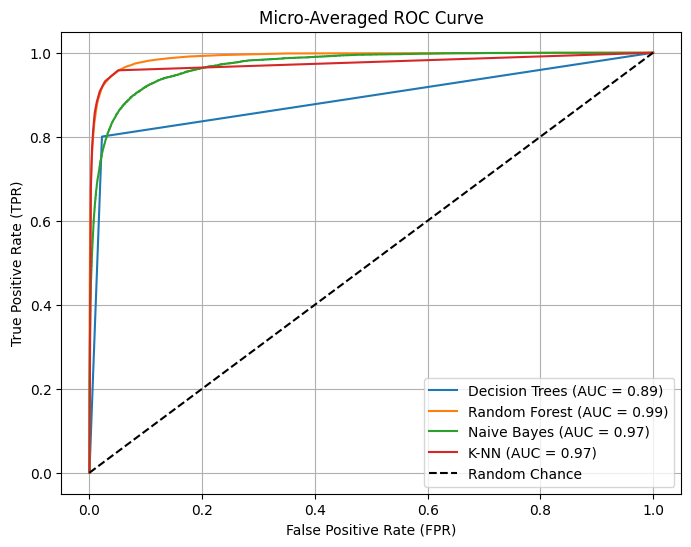

In [17]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Convert the true labels to one-hot encoded format
y_test_bin = label_binarize(y_test, classes=range(10))

# For Decision Trees
dt_pred_probs = dt_classifier.predict_proba(X_test_pca)
dt_fpr, dt_tpr, _ = roc_curve(y_test_bin.ravel(), dt_pred_probs.ravel())
dt_auc = auc(dt_fpr, dt_tpr)

# For Random Forest
rf_pred_probs = rf_classifier.predict_proba(X_test_pca)
rf_fpr, rf_tpr, _ = roc_curve(y_test_bin.ravel(), rf_pred_probs.ravel())
rf_auc = auc(rf_fpr, rf_tpr)

# For Naive Bayes
nb_pred_probs = nb_classifier.predict_proba(X_test_pca)
nb_fpr, nb_tpr, _ = roc_curve(y_test_bin.ravel(), nb_pred_probs.ravel())
nb_auc = auc(nb_fpr, nb_tpr)

# For K-NN
knn_pred_probs = knn_classifier.predict_proba(X_test_pca)
knn_fpr, knn_tpr, _ = roc_curve(y_test_bin.ravel(), knn_pred_probs.ravel())
knn_auc = auc(knn_fpr, knn_tpr)


# Plot micro-averaged ROC curves for each classifier
plt.figure(figsize=(8, 6))
plt.plot(dt_fpr, dt_tpr, label='Decision Trees (AUC = {:.2f})'.format(dt_auc))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(rf_auc))
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (AUC = {:.2f})'.format(nb_auc))
plt.plot(knn_fpr, knn_tpr, label='K-NN (AUC = {:.2f})'.format(knn_auc))
#plt.plot(svm_fpr, svm_tpr, label='SVM (AUC = {:.2f})'.format(svm_auc))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Micro-Averaged ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

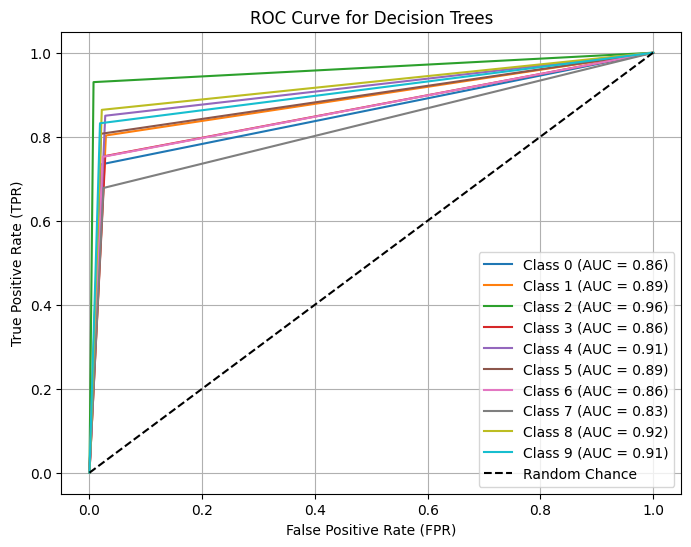

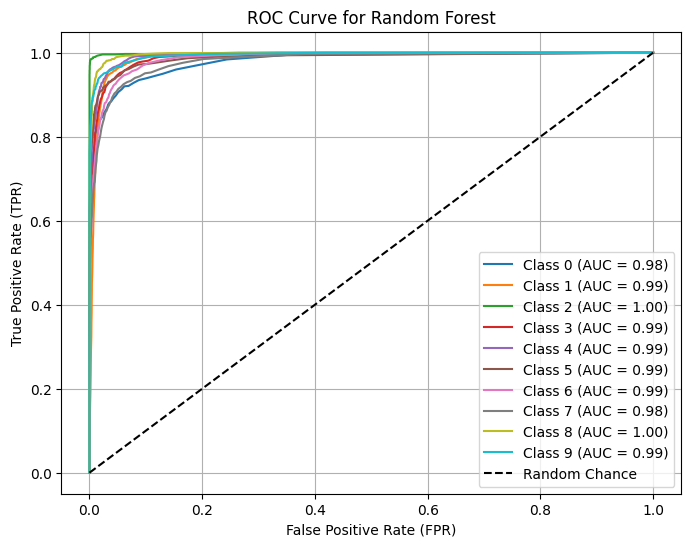

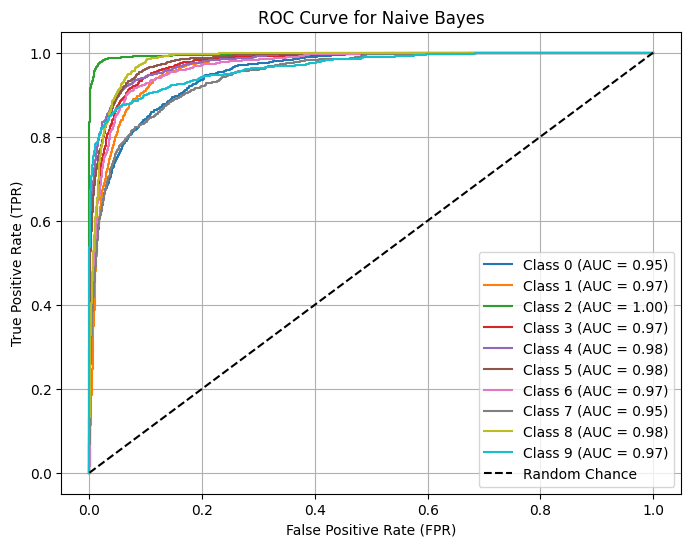

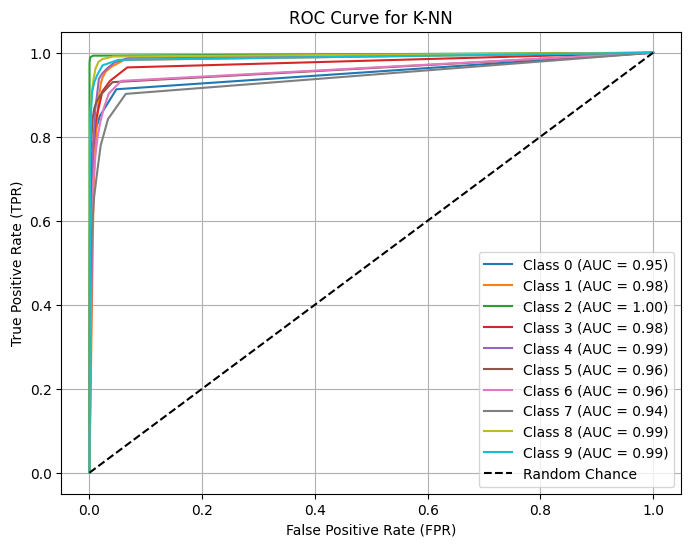

In [18]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Convert the true labels to one-hot encoded format
y_test_bin = label_binarize(y_test, classes=range(10))

# For Decision Trees
dt_fpr = dict()
dt_tpr = dict()
dt_auc = dict()
for class_idx in range(10):
    dt_pred_probs = dt_classifier.predict_proba(X_test_pca)[:, class_idx]
    dt_fpr[class_idx], dt_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], dt_pred_probs)
    dt_auc[class_idx] = auc(dt_fpr[class_idx], dt_tpr[class_idx])

# For Random Forest
rf_fpr = dict()
rf_tpr = dict()
rf_auc = dict()
for class_idx in range(10):
    rf_pred_probs = rf_classifier.predict_proba(X_test_pca)[:, class_idx]
    rf_fpr[class_idx], rf_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], rf_pred_probs)
    rf_auc[class_idx] = auc(rf_fpr[class_idx], rf_tpr[class_idx])

# For Naive Bayes
nb_fpr = dict()
nb_tpr = dict()
nb_auc = dict()
for class_idx in range(10):
    nb_pred_probs = nb_classifier.predict_proba(X_test_pca)[:, class_idx]
    nb_fpr[class_idx], nb_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], nb_pred_probs)
    nb_auc[class_idx] = auc(nb_fpr[class_idx], nb_tpr[class_idx])

# For K-NN
knn_fpr = dict()
knn_tpr = dict()
knn_auc = dict()
for class_idx in range(10):
    knn_pred_probs = knn_classifier.predict_proba(X_test_pca)[:, class_idx]
    knn_fpr[class_idx], knn_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], knn_pred_probs)
    knn_auc[class_idx] = auc(knn_fpr[class_idx], knn_tpr[class_idx])

# Plot ROC curves for each class for Decision Trees
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(dt_fpr[class_idx], dt_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, dt_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Decision Trees')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot ROC curves for each class for Random Forest
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(rf_fpr[class_idx], rf_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, rf_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot ROC curves for each class for Naive Bayes
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(nb_fpr[class_idx], nb_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, nb_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Naive Bayes')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot ROC curves for each class for K-NN
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(knn_fpr[class_idx], knn_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, knn_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for K-NN')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [19]:
X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

# Perform PCA with 10 components
pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(X_train_2d)
X_test_pca = pca.transform(X_test_2d)

In [20]:
dt_classifier = DecisionTreeClassifier()
evaluation_results = evaluate_model(dt_classifier, X_train_pca, y_train, X_test_pca, y_test)
dt_accuracy, dt_f1, dt_recall, dt_roc_auc, additional_value = evaluation_results

# Print the values returned by the function
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree F1-score:", dt_f1)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree ROC-AUC:", dt_roc_auc)

Decision Tree Accuracy: 0.8072
Decision Tree F1-score: 0.8062029058100396
Decision Tree Recall: 0.8071999999999999
Decision Tree ROC-AUC: 0.8928888888888888


In [21]:
rf_classifier = RandomForestClassifier()
evaluation_results = evaluate_model(dt_classifier, X_train_pca, y_train, X_test_pca, y_test)
rf_accuracy, rf_f1, rf_recall, rf_roc_auc, additional_value = evaluation_results

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest F1-score:", rf_f1)
print("Random Forest Recall:", rf_recall)
print("Random Forest ROC-AUC:", rf_roc_auc)

Random Forest Accuracy: 0.8093
Random Forest F1-score: 0.8084015351741781
Random Forest Recall: 0.8093
Random Forest ROC-AUC: 0.8940555555555555


In [22]:
nb_classifier = GaussianNB()
evaluation_results = evaluate_model(dt_classifier, X_train_pca, y_train, X_test_pca, y_test)
nb_accuracy, nb_f1, nb_recall, nb_roc_auc, additional_value = evaluation_results

print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes F1-score:", nb_f1)
print("Naive Bayes Recall:", nb_recall)
print("Naive Bayes ROC-AUC:", nb_roc_auc)

Naive Bayes Accuracy: 0.8095
Naive Bayes F1-score: 0.8085094790984915
Naive Bayes Recall: 0.8095000000000001
Naive Bayes ROC-AUC: 0.8941666666666667


In [23]:
knn_classifier = KNeighborsClassifier(n_neighbors=8)
evaluation_results = evaluate_model(dt_classifier, X_train_pca, y_train, X_test_pca, y_test)
knn_accuracy, knn_f1, knn_recall, knn_roc_auc, additional_value = evaluation_results

print("K-NN Accuracy:", knn_accuracy)
print("K-NN F1-score:", knn_f1)
print("K-NN Recall:", knn_recall)
print("K-NN ROC-AUC:", knn_roc_auc)

K-NN Accuracy: 0.8085
K-NN F1-score: 0.8075900633570197
K-NN Recall: 0.8085000000000001
K-NN ROC-AUC: 0.8936111111111111


In [24]:
svm_classifier = SVC(probability=True)
evaluation_results = evaluate_model(dt_classifier, X_train_pca, y_train, X_test_pca, y_test)
svm_accuracy, svm_f1, svm_recall, svm_roc_auc, additional_value = evaluation_results

print("SVM Accuracy:", svm_accuracy)
print("SVM F1-score:", svm_f1)
print("SVM Recall:", svm_recall)
print("SVM ROC-AUC:", svm_roc_auc)

SVM Accuracy: 0.8093
SVM F1-score: 0.8084789309116409
SVM Recall: 0.8093
SVM ROC-AUC: 0.8940555555555557


In [26]:
from sklearn.decomposition import IncrementalPCA

# Reshape the training and test data to 2D
x_train_2d = X_train.reshape(x_train.shape[0], -1)
x_test_2d = X_test.reshape(X_test.shape[0], -1)

# Create and fit Incremental PCA
ipca = IncrementalPCA(n_components=10, batch_size=1000)
for batch in np.array_split(x_train_2d, len(x_train_2d) // 1000):
    ipca.partial_fit(batch)

# Transform the data using IPCA
x_train_ipca = ipca.transform(x_train_2d)
x_test_ipca = ipca.transform(x_test_2d)

# Print the shape of the transformed data
print("Training data shape after IPCA:", x_train_ipca.shape)
print("Test data shape after IPCA:", x_test_ipca.shape)

Training data shape after IPCA: (60000, 10)
Test data shape after IPCA: (10000, 10)


In [27]:
'x_train_ipca','x_test_ipca'

('x_train_ipca', 'x_test_ipca')

In [29]:
dt_classifier = DecisionTreeClassifier()
evaluation_results = evaluate_model(dt_classifier, X_train_pca, y_train, X_test_pca, y_test)
dt_accuracy, dt_f1, dt_recall, dt_roc_auc, additional_value = evaluation_results

# Print the values returned by the function
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree F1-score:", dt_f1)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree ROC-AUC:", dt_roc_auc)

Decision Tree Accuracy: 0.8061
Decision Tree F1-score: 0.805335619250562
Decision Tree Recall: 0.8061
Decision Tree ROC-AUC: 0.8922777777777778


In [30]:
rf_classifier = RandomForestClassifier()
evaluation_results = evaluate_model(dt_classifier, X_train_pca, y_train, X_test_pca, y_test)
rf_accuracy, rf_f1, rf_recall, rf_roc_auc, additional_value = evaluation_results

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest F1-score:", rf_f1)
print("Random Forest Recall:", rf_recall)
print("Random Forest ROC-AUC:", rf_roc_auc)

Random Forest Accuracy: 0.8047
Random Forest F1-score: 0.8038290383323602
Random Forest Recall: 0.8047000000000001
Random Forest ROC-AUC: 0.8915000000000001


In [31]:
nb_classifier = GaussianNB()
evaluation_results = evaluate_model(dt_classifier, X_train_pca, y_train, X_test_pca, y_test)
nb_accuracy, nb_f1, nb_recall, nb_roc_auc, additional_value = evaluation_results

print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes F1-score:", nb_f1)
print("Naive Bayes Recall:", nb_recall)
print("Naive Bayes ROC-AUC:", nb_roc_auc)

Naive Bayes Accuracy: 0.8086
Naive Bayes F1-score: 0.8077149940774951
Naive Bayes Recall: 0.8086
Naive Bayes ROC-AUC: 0.8936666666666666


In [32]:
knn_classifier = KNeighborsClassifier(n_neighbors=8)
evaluation_results = evaluate_model(dt_classifier, X_train_pca, y_train, X_test_pca, y_test)
knn_accuracy, knn_f1, knn_recall, knn_roc_auc, additional_value = evaluation_results

print("K-NN Accuracy:", knn_accuracy)
print("K-NN F1-score:", knn_f1)
print("K-NN Recall:", knn_recall)
print("K-NN ROC-AUC:", knn_roc_auc)

K-NN Accuracy: 0.8097
K-NN F1-score: 0.8088623172171563
K-NN Recall: 0.8097
K-NN ROC-AUC: 0.8942777777777777


In [33]:
svm_classifier = SVC(probability=True)
evaluation_results = evaluate_model(dt_classifier, X_train_pca, y_train, X_test_pca, y_test)
svm_accuracy, svm_f1, svm_recall, svm_roc_auc, additional_value = evaluation_results

print("SVM Accuracy:", svm_accuracy)
print("SVM F1-score:", svm_f1)
print("SVM Recall:", svm_recall)
print("SVM ROC-AUC:", svm_roc_auc)

SVM Accuracy: 0.8071
SVM F1-score: 0.8062353903428064
SVM Recall: 0.8070999999999999
SVM ROC-AUC: 0.8928333333333333
